#### Import Libraries & Dataset

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your CSV file
csv_file_path = '/content/drive/My Drive/datasets/phishing_dataset_train.csv'

# Import Dataset
dataset = pd.read_csv(csv_file_path)

# Get Dataset shape (i.e. rows, cols)
print(dataset.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(700, 26)


#### Visualize Raw Dataset

In [2]:
# Visualize first 10 rows within dataset
dataset.head(10)

,domain_similarity,url_length,http_protocol,num_dot,num_slash,num_double_slash,num_hyphen,num_underscore,num_equal,num_paranthesis,...,url_inc_at,url_inc_ip,response_history,redirect,num_a_href,num_input,num_button,num_link_href,num_iframe,class
0,0.89,29,1,1,0,1,0,0,0,0,...,0,0,13,0,37,1,13,4,0,0
1,0.88,28,1,1,0,1,0,0,0,0,...,0,0,13,0,45,2,8,11,3,0
2,0.87,35,1,0,0,1,0,0,0,0,...,0,0,25,0,49,1,2,24,0,1
3,0.49,64,1,1,3,1,0,0,0,0,...,0,0,25,0,6,1,1,3,0,1
4,0.83,23,1,1,0,1,0,0,0,0,...,0,0,13,0,20,0,0,3,1,0
5,0.88,20,1,0,0,1,0,0,0,0,...,0,0,7,0,42,0,2,2,0,0
6,0.56,59,1,2,4,1,2,0,0,0,...,0,0,25,0,3,0,0,2,0,1
7,0.32,63,1,0,4,1,2,0,0,0,...,0,0,25,0,1,6,15,1,1,1
8,0.88,36,0,1,0,1,0,0,0,0,...,0,0,25,0,4,0,0,0,0,1
9,0.87,27,1,1,0,1,0,0,1,0,...,0,0,11,0,42,1,1,54,0,0


#### View Dataset Features w/ Data Types

In [3]:
# View dataset feature names and their data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   domain_similarity     700 non-null    float64
 1   url_length            700 non-null    int64  
 2   http_protocol         700 non-null    int64  
 3   num_dot               700 non-null    int64  
 4   num_slash             700 non-null    int64  
 5   num_double_slash      700 non-null    int64  
 6   num_hyphen            700 non-null    int64  
 7   num_underscore        700 non-null    int64  
 8   num_equal             700 non-null    int64  
 9   num_paranthesis       700 non-null    int64  
 10  num_curly_bracket     700 non-null    int64  
 11  num_square_bracket    700 non-null    int64  
 12  num_less_and_greater  700 non-null    int64  
 13  num_tilde             700 non-null    int64  
 14  num_asterisk          700 non-null    int64  
 15  num_plus              7

#### Add New Column for Categorical Classification

In [4]:
# Consolidate all instances of the class labelled '1'
dataset['Classification'] = np.where(dataset['class']==1, 'Phishing', 'Non-Phishing')
dataset.head()

,domain_similarity,url_length,http_protocol,num_dot,num_slash,num_double_slash,num_hyphen,num_underscore,num_equal,num_paranthesis,...,url_inc_ip,response_history,redirect,num_a_href,num_input,num_button,num_link_href,num_iframe,class,Classification
0,0.89,29,1,1,0,1,0,0,0,0,...,0,13,0,37,1,13,4,0,0,Non-Phishing
1,0.88,28,1,1,0,1,0,0,0,0,...,0,13,0,45,2,8,11,3,0,Non-Phishing
2,0.87,35,1,0,0,1,0,0,0,0,...,0,25,0,49,1,2,24,0,1,Phishing
3,0.49,64,1,1,3,1,0,0,0,0,...,0,25,0,6,1,1,3,0,1,Phishing
4,0.83,23,1,1,0,1,0,0,0,0,...,0,13,0,20,0,0,3,1,0,Non-Phishing


In [5]:
# Drop the Label feature since Class was added
dataset = dataset.drop(dataset.columns[-2],axis=1)
dataset.head()

,domain_similarity,url_length,http_protocol,num_dot,num_slash,num_double_slash,num_hyphen,num_underscore,num_equal,num_paranthesis,...,url_inc_at,url_inc_ip,response_history,redirect,num_a_href,num_input,num_button,num_link_href,num_iframe,Classification
0,0.89,29,1,1,0,1,0,0,0,0,...,0,0,13,0,37,1,13,4,0,Non-Phishing
1,0.88,28,1,1,0,1,0,0,0,0,...,0,0,13,0,45,2,8,11,3,Non-Phishing
2,0.87,35,1,0,0,1,0,0,0,0,...,0,0,25,0,49,1,2,24,0,Phishing
3,0.49,64,1,1,3,1,0,0,0,0,...,0,0,25,0,6,1,1,3,0,Phishing
4,0.83,23,1,1,0,1,0,0,0,0,...,0,0,13,0,20,0,0,3,1,Non-Phishing


#### Specify Feature Columns for Panda Dataframe Analysis

In [6]:
# Define features to be used by the classifier
features = pd.Index(['Domain Similarity', 'URL Length', 'HTTP Protocol',
                    'No. of Dot', 'No. of Slash', 'No. of Double Slash', 'No. of Hyphen',
                    'No. of Underscore', 'No. of Equal', 'No. of Parenthesis', 'No of Curly Bracket', 'No. of Square Bracket',
                    'No. of Less Than and Greater Than', 'No. of Tilde', 'No. of Asterisk', 'No. of Plus', 'URL Include @', 'URL Include IP',
                    'Server Response History', 'Redirect', 'No. of <a> Tag', 'No. of <input> Tag', 'No. of <button> Tag', 'No. of <link> Tag',
                    'No. of <iframe> Tag'])

#### Conduct Dataset Cleaning

In [7]:
# Delete rows with null values
dataset.dropna(inplace=True)

# Remove duplicated rows (avoid overfitting)
dataset.drop_duplicates(inplace=True)

print(dataset.shape)

(641, 26)


#### Split Dataset into Training and Test Set

In [8]:
# With 'Classification' being the target variable, drop for X and add for y
X = dataset.drop('Classification', axis=1)
y = dataset['Classification']

# Split dataset into 85% training and 15% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#### Perform Feature Scaling

In [9]:
# Using the StandardScaler from scikit-learn lib
# Create scaler obj
sc = StandardScaler()

# Compute the mean and std of the training data
X_train = sc.fit_transform(X_train)

# Compute the mean and std of the test data
X_test = sc.transform(X_test)

#### 1. K-Nearest Neighbors Model Analysis

##### Training the K-NN model

In [10]:
# No. of neighbor cluster set to 5
# Distance metric set to minkowski (which is a combination of Manhattan and Euclidean)
# P=2 sets the minkowski to be more equivalent to Euclidean Distance
#knn = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
knn = KNeighborsClassifier()

# Train the K-NN classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

##### Test K-NN Model Predictions

In [11]:
# Test the trained model using the test set
knn_start = time.time()
knn_pred = knn.predict(X_test)
knn_end = time.time()

# Calculate prediction time
knn_pred_time = knn_end - knn_start

print("KNN Prediction Time: ", knn_pred_time)
print("KNN Accuracy:",  accuracy_score(y_test, knn_pred))
print("KNN F1-score:", f1_score(y_test, knn_pred, pos_label = 'Phishing'))

KNN Prediction Time:  0.13606858253479004
KNN Accuracy: 0.979381443298969
KNN F1-score: 0.9807692307692307


#### 2. Decision Tree Model Analysis

##### Training the DT model

In [12]:
# Criterion = Gini impurity
#dtree = DecisionTreeClassifier(criterion= 'gini', random_state=0)
dtree = DecisionTreeClassifier()

# Train the Decision Tree classifier
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

##### Test Decision Tree Model Predictions

In [13]:
# Test the trained model using the test set
dt_start = time.time()
dtree_pred = dtree.predict(X_test)
dt_end = time.time()

# Calculate prediction time
dt_pred_time = dt_end - dt_start

print("DT Prediction Time: ", dt_pred_time)
print("DT Accuracy:",  accuracy_score(y_test, dtree_pred))
print("DT F1-score:", f1_score(y_test, dtree_pred, pos_label = 'Phishing'))

DT Prediction Time:  0.005805492401123047
DT Accuracy: 0.9896907216494846
DT F1-score: 0.9904761904761905


#### 3. Random Forest Model Analysis

##### Training the RF model

In [14]:
# random forest model creation
rfc = RandomForestClassifier()

# Train the Random Forest classifier
rfc.fit(X_train,y_train)

RandomForestClassifier()

##### Test RF Model Predictions

In [15]:
# Test the trained model using the test set
rf_start = time.time()
rf_pred = rfc.predict(X_test)
rf_end = time.time()

# Calculate prediction time
rf_pred_time = rf_end - rf_start

print("RF Prediction Time: ", rf_pred_time)
print("RF Accuracy:",  accuracy_score(y_test, rf_pred))
print("RF F1-score:", f1_score(y_test, rf_pred, pos_label = 'Phishing'))

RF Prediction Time:  0.01888728141784668
RF Accuracy: 1.0
RF F1-score: 1.0


#### 4. Multilayer Perceptron Model Analysis

##### Training the MLP model

In [16]:
# Two hidden layers with 100 and 50 neurons
# ReLU Activation function
# Regularization term (L2)
# Broyden–Fletcher–Goldfarb–Shanno (L-BFGS) optimization algorithm
#mlp = MLPClassifier(hidden_layer_sizes=(100,50), activation='relu', alpha=0.00001, max_iter=200, solver='lbfgs', random_state=0)
mlp = MLPClassifier()

# Train the Decision Tree classifier
mlp.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

##### Test MLP Model Predictions

In [17]:
# Test the trained model using the test set
mlp_start = time.time()
mlp_pred = mlp.predict(X_test)
mlp_end = time.time()

# Calculate prediction time
mlp_pred_time = mlp_end - mlp_start

print("MLP Prediction Time: ", mlp_pred_time)
print("MLP Accuracy:",  accuracy_score(y_test, mlp_pred))
print("MLP F1-score:", f1_score(y_test, mlp_pred, pos_label = 'Phishing'))

MLP Prediction Time:  0.0059337615966796875
MLP Accuracy: 0.9587628865979382
MLP F1-score: 0.9607843137254902


##### Baseline Results Combined

In [19]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define column names
table.field_names = ["Model / Algorithm", "Prediction Time", "Accuracy", "F1-Score"]

# Add rows to the table
table.add_row(["KNN", knn_pred_time, accuracy_score(y_test, knn_pred), f1_score(y_test, knn_pred, pos_label = 'Phishing')])
table.add_row(["DT", dt_pred_time, accuracy_score(y_test, dtree_pred), f1_score(y_test, dtree_pred, pos_label = 'Phishing')])
table.add_row(["RF", rf_pred_time, accuracy_score(y_test, rf_pred), f1_score(y_test, rf_pred, pos_label = 'Phishing')])
table.add_row(["MLP", mlp_pred_time, accuracy_score(y_test, mlp_pred), f1_score(y_test, mlp_pred, pos_label = 'Phishing')])

print(table)

+-------------------+-----------------------+--------------------+--------------------+
| Model / Algorithm |    Prediction Time    |      Accuracy      |      F1-Score      |
+-------------------+-----------------------+--------------------+--------------------+
|        KNN        |  0.13606858253479004  | 0.979381443298969  | 0.9807692307692307 |
|         DT        |  0.005805492401123047 | 0.9896907216494846 | 0.9904761904761905 |
|         RF        |  0.01888728141784668  |        1.0         |        1.0         |
|        MLP        | 0.0059337615966796875 | 0.9587628865979382 | 0.9607843137254902 |
+-------------------+-----------------------+--------------------+--------------------+


##### Training the K-NN model w/ Param Fine-Tunning

In [22]:
# No. of neighbor cluster set to 5
# Distance metric set to minkowski (which is a combination of Manhattan and Euclidean)
# P=1 sets the minkowski to be more equivalent to Manhattan Distance
knn_model = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=1)

# Train the K-NN classifier
knn_model.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [23]:
# Test the trained model using the test set
knn_model_start = time.time()
knn_model_pred = knn_model.predict(X_test)
knn_model_end = time.time()

# Calculate prediction time
knn_model_pred_time = knn_model_end - knn_model_start

print("KNN w/ Fine-Tunning Prediction Time: ", knn_model_pred_time)
print("KNN w/ Fine-Tunning Accuracy:",  accuracy_score(y_test, knn_model_pred))
print("KNN w/ Fine-Tunning F1-score:", f1_score(y_test, knn_model_pred, pos_label = 'Phishing'))

KNN w/ Fine-Tunning Prediction Time:  0.016283512115478516
KNN w/ Fine-Tunning Accuracy: 0.979381443298969
KNN w/ Fine-Tunning F1-score: 0.9811320754716981


##### Training the DT model w/ Param Fine-Tunning

In [26]:
# Criterion = entropy
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=42)

# Train the Decision Tree classifier
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [27]:
# Test the trained model using the test set
dt_model_start = time.time()
dt_model_pred = dt_model.predict(X_test)
dt_model_end = time.time()

# Calculate prediction time
dt_model_pred_time = dt_model_end - dt_model_start

print("DT w/ Fine-Tunning Prediction Time: ", dt_model_pred_time)
print("DT w/ Fine-Tunning Accuracy:",  accuracy_score(y_test, dt_model_pred))
print("DT w/ Fine-Tunning F1-score:", f1_score(y_test, dt_model_pred, pos_label = 'Phishing'))

DT w/ Fine-Tunning Prediction Time:  0.002010345458984375
DT w/ Fine-Tunning Accuracy: 0.9896907216494846
DT w/ Fine-Tunning F1-score: 0.9904761904761905


##### Training the RF model w/ Param Fine-Tunning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Create random grid
random_grid = {'bootstrap': [True, False], # Method of selecting samples for training each tree
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], # Maximum number of levels in tree
               'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
               'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
               'n_estimators': [130, 180, 230]} # Number of trees in random forest

# random forest model creation
rf = RandomForestClassifier()

# n_iter = 100 different sets of hyperparameters will be randomly selected and evaluated
# cv=3, each set of hyperparameters will be evaluated using 3-fold cross-validation
# verbosity: the higher the value, the more messages are printed
# n_jobs = number of jobs to run in parallel
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Train the Random Forest classifier
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42, verbose=2)

In [30]:
# Test the trained model using the test set
rf_random_start = time.time()
rf_random_pred = rf_random.predict(X_test)
rf_random_end = time.time()

# Calculate prediction time
rf_random_pred_time = rf_random_end - rf_random_start

print("RF w/ Fine-Tunning Prediction Time: ", rf_random_pred_time)
print("RF w/ Fine-Tunning Accuracy:",  accuracy_score(y_test, rf_random_pred))
print("RF w/ Fine-Tunning F1-score:", f1_score(y_test, rf_random_pred, pos_label = 'Phishing'))

RF w/ Fine-Tunning Prediction Time:  0.017709016799926758
RF w/ Fine-Tunning Accuracy: 1.0
RF w/ Fine-Tunning F1-score: 1.0


##### Training the MLP model w/ Param Fine-Tunning

In [32]:
# Two hidden layers with 100 and 50 neurons
# ReLU Activation function
# Regularization term (L2)
# Broyden–Fletcher–Goldfarb–Shanno (L-BFGS) optimization algorithm
mlp_model = MLPClassifier(hidden_layer_sizes=(100,50), activation='logistic', alpha=0.00001, max_iter=200, solver='adam', random_state=42)

# Train the Decision Tree classifier
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(100, 50),
              random_state=42)

In [33]:
# Test the trained model using the test set
mlp_model_start = time.time()
mlp_model_pred = mlp_model.predict(X_test)
mlp_model_end = time.time()

# Calculate prediction time
mlp_model_pred_time = mlp_model_end - mlp_model_start

print("MLP Prediction Time: ", mlp_model_pred_time)
print("MLP Accuracy:",  accuracy_score(y_test, mlp_model_pred))
print("MLP F1-score:", f1_score(y_test, mlp_model_pred, pos_label = 'Phishing'))

MLP Prediction Time:  0.004193544387817383
MLP Accuracy: 0.9484536082474226
MLP F1-score: 0.9514563106796117


##### Hyperparam Fine-tunning Models Results Combined

In [34]:
# Create a PrettyTable object
table = PrettyTable()

# Define column names
table.field_names = ["Model / Algorithm", "Prediction Time", "Accuracy", "F1-Score"]

# Add rows to the table
table.add_row(["KNN", knn_model_pred_time, accuracy_score(y_test, knn_model_pred), f1_score(y_test, knn_model_pred, pos_label = 'Phishing')])
table.add_row(["DT", dt_model_pred_time, accuracy_score(y_test, dt_model_pred), f1_score(y_test, dt_model_pred, pos_label = 'Phishing')])
table.add_row(["RF", rf_random_pred_time, accuracy_score(y_test, rf_random_pred), f1_score(y_test, rf_random_pred, pos_label = 'Phishing')])
table.add_row(["MLP", mlp_model_pred_time, accuracy_score(y_test, mlp_model_pred), f1_score(y_test, mlp_model_pred, pos_label = 'Phishing')])

print(table)

+-------------------+----------------------+--------------------+--------------------+
| Model / Algorithm |   Prediction Time    |      Accuracy      |      F1-Score      |
+-------------------+----------------------+--------------------+--------------------+
|        KNN        | 0.016283512115478516 | 0.979381443298969  | 0.9811320754716981 |
|         DT        | 0.002010345458984375 | 0.9896907216494846 | 0.9904761904761905 |
|         RF        | 0.017709016799926758 |        1.0         |        1.0         |
|        MLP        | 0.004193544387817383 | 0.9484536082474226 | 0.9514563106796117 |
+-------------------+----------------------+--------------------+--------------------+


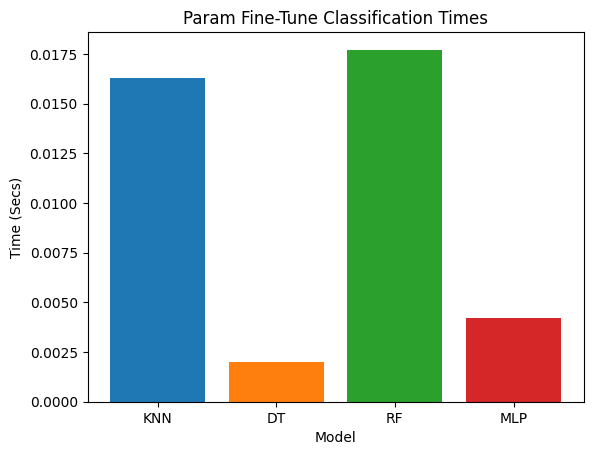

In [43]:
# Create bar chart using extracted values from table
plt.bar("KNN", knn_model_pred_time)
plt.bar("DT", dt_model_pred_time)
plt.bar("RF", rf_random_pred_time)
plt.bar("MLP", mlp_model_pred_time)

# Define chart labels
plt.title("Param Fine-Tune Classification Times")
plt.xlabel("Model")
plt.ylabel("Time (Secs)")

# Show plot
plt.show()

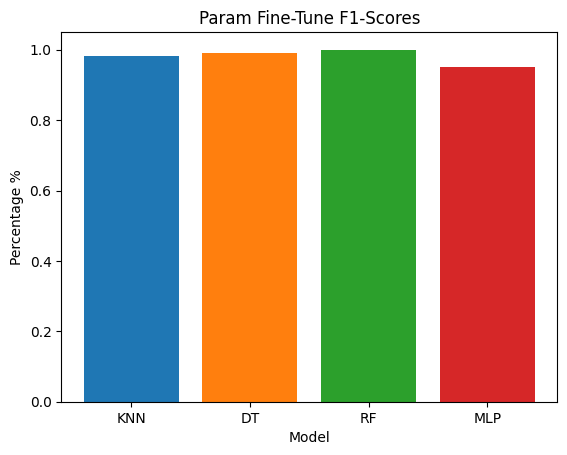

In [45]:
# Create bar chart using extracted values from table
plt.bar("KNN", f1_score(y_test, knn_model_pred, pos_label = 'Phishing'))
plt.bar("DT", f1_score(y_test, dt_model_pred, pos_label = 'Phishing'))
plt.bar("RF", f1_score(y_test, rf_random_pred, pos_label = 'Phishing'))
plt.bar("MLP", f1_score(y_test, mlp_model_pred, pos_label = 'Phishing'))

# Define chart labels
plt.title("Param Fine-Tune F1-Scores")
plt.xlabel("Model")
plt.ylabel("Percentage %")

# Show plot
plt.show()

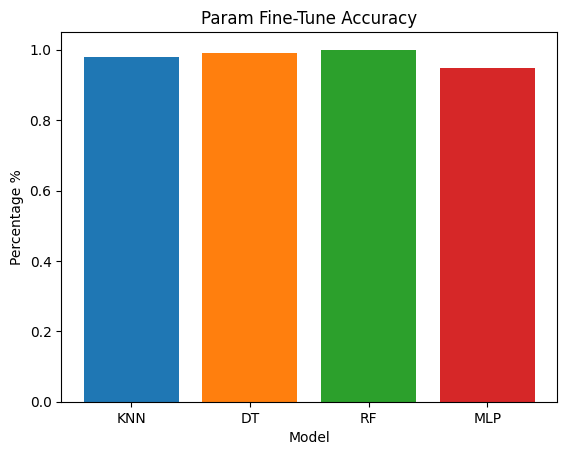

In [46]:
# Create bar chart using extracted values from table
plt.bar("KNN", accuracy_score(y_test, knn_model_pred))
plt.bar("DT", accuracy_score(y_test, dt_model_pred))
plt.bar("RF", accuracy_score(y_test, rf_random_pred))
plt.bar("MLP", accuracy_score(y_test, mlp_model_pred))

# Define chart labels
plt.title("Param Fine-Tune Accuracy")
plt.xlabel("Model")
plt.ylabel("Percentage %")

# Show plot
plt.show()

#### Optimal Model Selection

##### Feature Selection using SelectKBest

In [35]:
# Feature Selection (K=10)
skb = SelectKBest(score_func=f_classif, k=10)

X_train_selected = skb.fit_transform(X_train, y_train)
X_test_selected = skb.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 9 10 11 12 14 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [36]:
# Retrieve selected features
selected_features = skb.get_support(indices=True)

# Get feature names
selected_feature_names = X.columns[selected_features]

print("Selected feature names:", selected_feature_names)

Selected feature names: Index(['domain_similarity', 'url_length', 'http_protocol', 'num_slash',
       'num_hyphen', 'response_history', 'redirect', 'num_a_href',
       'num_link_href', 'num_iframe'],
      dtype='object')


##### Train & test the DT model (Optimal Selected Model)

In [37]:
# Optimal DT model creation
optimal_model = DecisionTreeClassifier(criterion= 'entropy', random_state=42)

# Train the Decision Tree classifier
optimal_model.fit(X_train_selected, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [38]:
# Test the trained model using the test set
model_start = time.time()
model_pred = optimal_model.predict(X_test_selected)
model_end = time.time()

# Calculate prediction time
model_pred_time = model_end - model_start

print("DT Prediction Time: ", model_pred_time)
print("DT Accuracy:",  accuracy_score(y_test, model_pred))
print("DT F1-score:", f1_score(y_test, model_pred, pos_label = 'Phishing'))

DT Prediction Time:  0.0009722709655761719
DT Accuracy: 0.9896907216494846
DT F1-score: 0.9904761904761905


In [39]:
# Create a PrettyTable object
table = PrettyTable()

# Define column names
table.field_names = ["Iteration", "Model / Algorithm", "Prediction Time", "Accuracy", "F1-Score"]

# Add rows to the table
table.add_row(["Baseline", "DT", dt_pred_time, accuracy_score(y_test, dtree_pred), f1_score(y_test, dtree_pred, pos_label = 'Phishing')])
table.add_row(["Param Fine-Tune", "DT", dt_model_pred_time, accuracy_score(y_test, dt_model_pred), f1_score(y_test, dt_model_pred, pos_label = 'Phishing')])
table.add_row(["Optimal", "DT", model_pred_time, accuracy_score(y_test, model_pred), f1_score(y_test, model_pred, pos_label = 'Phishing')])

print(table)

+-----------------+-------------------+-----------------------+--------------------+--------------------+
|    Iteration    | Model / Algorithm |    Prediction Time    |      Accuracy      |      F1-Score      |
+-----------------+-------------------+-----------------------+--------------------+--------------------+
|     Baseline    |         DT        |  0.005805492401123047 | 0.9896907216494846 | 0.9904761904761905 |
| Param Fine-Tune |         DT        |  0.002010345458984375 | 0.9896907216494846 | 0.9904761904761905 |
|     Optimal     |         DT        | 0.0009722709655761719 | 0.9896907216494846 | 0.9904761904761905 |
+-----------------+-------------------+-----------------------+--------------------+--------------------+


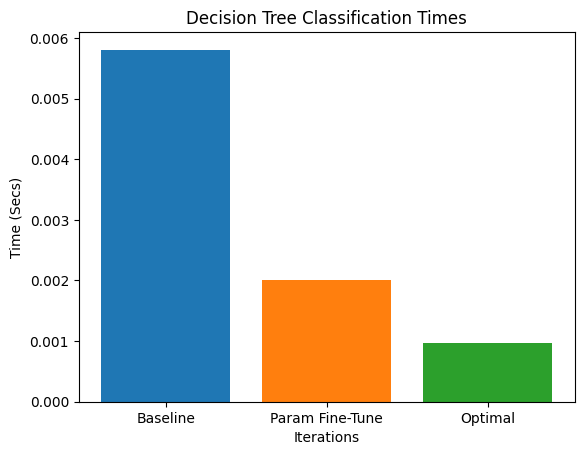

In [42]:
# Create bar chart using extracted values from table
plt.bar("Baseline", dt_pred_time)
plt.bar("Param Fine-Tune", dt_model_pred_time)
plt.bar("Optimal", model_pred_time)

# Define chart labels
plt.title("Decision Tree Classification Times")
plt.xlabel("Iterations")
plt.ylabel("Time (Secs)")

# Show plot
plt.show()

#### Save Trained Model w/ top 10 Best Features:
1. domain_similarity
2. url_length
3. http_protocol
4. num_slash
5. num_hyphen
6. response_history
7. redirect
8. num_a_href
9. num_link_href
10. num_iframe

In [41]:
import joblib

base_path = '/content/drive/My Drive/datasets/models/'

model_path = base_path + 'dt_model.joblib'
scaler_path = base_path + 'scaler.joblib'
selector_path = base_path + 'selector.joblib'

# Save classifier, scaler and selector
joblib.dump(optimal_model, model_path)
joblib.dump(sc, scaler_path)
joblib.dump(skb, selector_path)

['/content/drive/My Drive/datasets/models/selector.joblib']